In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

from matplotlib import style 
style.use('ggplot') or plt.style.use('ggplot')

In [4]:
myMovies = pd.read_csv('/Users/mailuu/Documents/Formation DataAnalyst - Wild Code Shool/Projet 3/Dataset deja traite/test dashboard et ML.csv')
myMovies.head(2)

,Unnamed: 0,movieId,genres,imdbId,year,actors,director,rating,titre,Action,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,primaryName,year.str,Total infos
0,0,1,"Adventure, Animation, Children, Comedy, Fantasy",tt0114709,1995,"Tom Hanks, Tim Allen, Jim Varney, Don Rickles",John Lasseter,3.92093,Toy Story,0,...,0,0,0,0,0,0,0,Tom Hanks,1995,"Toy Story , 1995, Tom Hanks, Tim Allen, Jim Va..."
1,1,1,"Adventure, Animation, Children, Comedy, Fantasy",tt0114709,1995,"Tom Hanks, Tim Allen, Jim Varney, Don Rickles",John Lasseter,3.92093,Toy Story,0,...,0,0,0,0,0,0,0,Tim Allen,1995,"Toy Story , 1995, Tom Hanks, Tim Allen, Jim Va..."


In [ ]:
#myMovies['Total infos'] = myMovies['Total infos'] + ', ' + myMovies['imdbId']
#myMovies.head(2)

# Dataviz

insert a name Cameron Diaz


Text(0.5, 1.0, 'Les genres de film que Cameron Diaz y a participé')

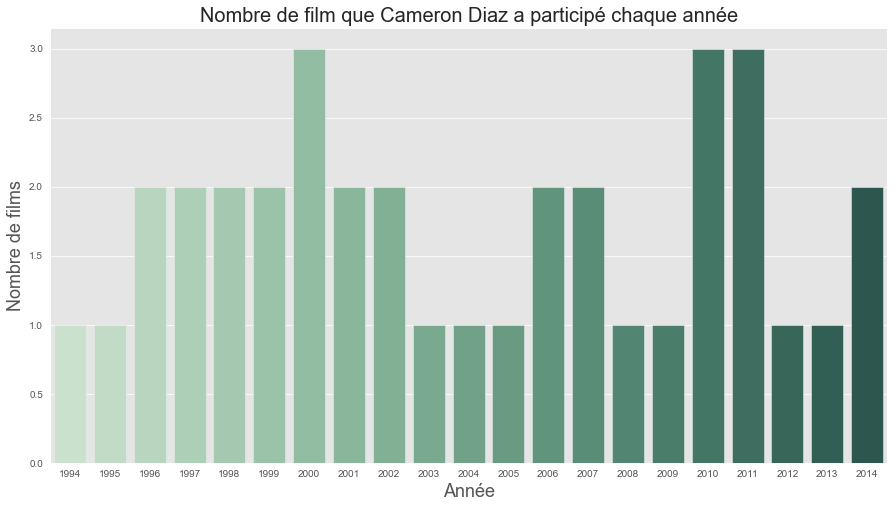

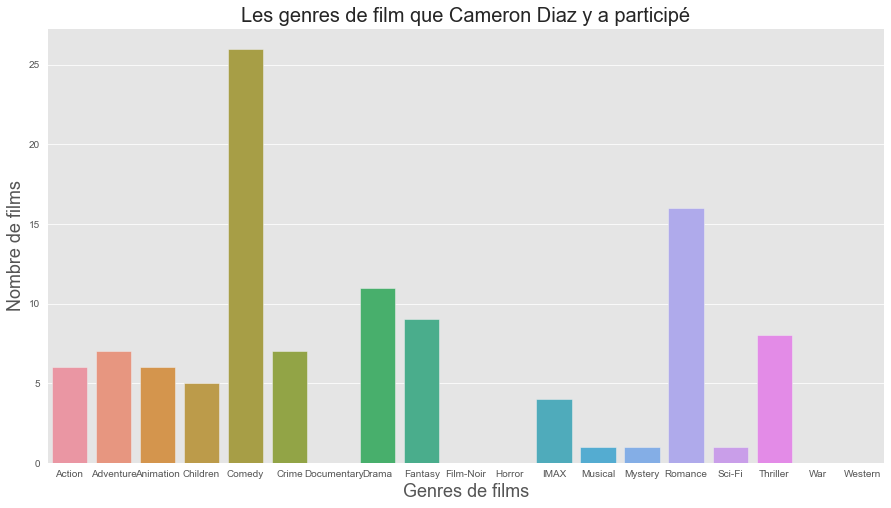

In [3]:
text = input('insert a name ')
df1 = pd.DataFrame(myMovies[myMovies['primaryName'] == text].groupby(['year'])['titre'].count()).reset_index()
plt.figure(figsize = (15,8))
sns.barplot('year', 'titre', data = df1, palette = "ch:2.5,-.2,dark=.3")
plt.xlabel('Année', fontsize =18)
plt.ylabel('Nombre de films', fontsize=18)
plt.title('Nombre de film que {} a participé chaque année'.format(text), fontsize=20)


df2 = pd.DataFrame(myMovies[myMovies['primaryName'] == text].sum()).reset_index().loc[9:27, : ]
plt.figure(figsize = (15,8))
sns.barplot('index', 0, data = df2)
plt.xlabel('Genres de films' , fontsize =18)
plt.ylabel('Nombre de films', fontsize=18)
plt.title('Les genres de film que {} y a participé'.format(text), fontsize = 20)

# Modèle de Recommandation par Vectorisation

In [5]:
myMoviesML = myMovies[['movieId', 'Total infos']].drop_duplicates(subset = 'movieId', keep = 'first')
myMoviesML.head()

,movieId,Total infos
0,1,"Toy Story , 1995, Tom Hanks, Tim Allen, Jim Va..."
10,2,"Jumanji , 1995, Robin Williams, Kirsten Dunst,..."
20,3,"Grumpier Old Men , 1995, Sophia Loren, Ann-Mar..."
30,4,"Waiting to Exhale , 1995, Angela Bassett, Whit..."
40,5,"Father of the Bride Part II , 1995, Steve Mart..."


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline


text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='modified_huber', penalty='l2',
                           alpha=1e-3,
                           random_state=42,
                           #shuffle=False,
                           max_iter=5, tol=None)),
])


titles = []
for a in myMoviesML['Total infos']:
  titles.append(a)

text_clf.fit(titles, titles)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='modified_huber',
                               max_it

In [7]:
predicted = text_clf.predict(titles)
np.mean(predicted == titles)

0.9997908606085957

In [8]:
def get_closest_results(text, n_results):
  probas = text_clf.predict_proba([text])
  max_proba_indices = probas[0].argsort()[-n_results:]
  last = len(max_proba_indices) - 1
  out = []
  for i in range(last, last - n_results, -1) :
    out.append(text_clf.classes_[max_proba_indices[i]])
  return out

In [ ]:
"""
add_text = input('Tapez un mot clé: ')
print("--------------------------")

search_results = get_closest_results(add_text, 5)
for r in search_results:
  print(r)
"""

# TKinter

In [9]:
import tkinter as tk

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 400, height = 500,  relief = 'raised')
canvas1.pack()

label1 = tk.Label(root, text='Proposition des films')
label1.config(font=('helvetica', 14))
canvas1.create_window(200, 25, window=label1)

label2 = tk.Label(root, text='Tapez un mot clé :', width=200)
label2.config(font=('helvetica', 10))
canvas1.create_window(200, 100, window=label2)

entry1 = tk.Entry(root) 
canvas1.create_window(200, 140, window=entry1)

def print_result(text):
    print("calling results ...")
    name = get_closest_results(text, 5)
    out = ""
    for r in name:
        out += r
        out += "\n\n"
    return out
        
def getResults():
    x1 = entry1.get()
    
    label3 = tk.Label(root, text= 'Vous pourriez aimez ',font=('helvetica', 10))
    canvas1.create_window(200, 210, window=label3)
    
    resultsWidget = tk.Message(root, text = print_result(x1),
                               font=('helvetica', 10, 'bold'), width=390)
    canvas1.create_window(200, 350, window=resultsWidget)
 

button1 = tk.Button(root
                    , text='Soumettre'
                    , command=getResults
                    #, bg='#0052cc', fg='#ffffff'
                    , font=('helvetica', 9, 'bold')
                   )
canvas1.create_window(200, 180, window=button1)

root.mainloop()

calling results ...
